# Kaggle Competition on House prices
###### Team:  Ibrahim Hakami - Mohammed Alqahtani - Sumaiah Alsadhan

# Problem Statement

To **predict the sales price for each house.** For each Id in the test set provided in Kaggle House Prices Competition. prediction will be the value of the SalePrice variable. 
*Applying EDA and Modeling with a regression model in 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# EDA
### Data Cleaning, Feature engineering and visualization.

 # Data Cleaning

In [2]:
# loading training dataset
train = pd.read_csv('train_h.csv')

In [3]:
# take a look at the head of the training data set
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# shape of training dataset
train.shape

(1460, 81)

In [5]:
# loadinig testing dataset
test = pd.read_csv('test_h.csv')

In [6]:
# take a look at the head 
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [207]:
# the shape of the test data set
test.shape

(1459, 80)

In [208]:
# merging both dataset to do data cleaning on both at once, also getting more accurate filling resualt
df = train.merge(test , how='outer')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [209]:
# checking for nulls in all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

# Feature Engneering

In [210]:
# based on the discretion of the data Nan refers to inapplicability or availability
#of that feature hence it was filled with 'None' 
df[[ 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleCondition']] = df[[ 'Street', 'Alley', 'LotShape',
                                             'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl'
                                 , 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature'
                                 , 'SaleCondition']].fillna("None")

In [211]:
# checking missing values for categorical variables 
print(df.MSZoning.value_counts(),
df.Electrical.value_counts(),
df.KitchenQual.value_counts(),
df.Exterior1st.value_counts(),
df.Exterior2nd.value_counts(),
df.SaleType.value_counts())

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64 SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64 TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64 VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
CBlock        2
Stone         2
AsphShn       2
ImStucc       1
Name: Exterior1st, dtype: int64 VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64 WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [212]:
# using fill Mode technique to most data due to having high frequency of accuring
df.MSZoning.fillna(df['MSZoning'].mode()[0] , inplace = True)
df.Electrical.fillna(df['Electrical'].mode()[0] , inplace = True)
df.KitchenQual.fillna(df['KitchenQual'].mode()[0] , inplace = True)
df.Exterior1st.fillna(df['Exterior1st'].mode()[0] , inplace = True)
df.Exterior2nd.fillna(df['Exterior2nd'].mode()[0], inplace = True)
df.SaleType.fillna(df['SaleType'].mode()[0] , inplace = True)

In [213]:
# Fill null with 0 for most numeric columns, these columns should be zero because they dont exist in the house
df['GarageYrBlt'].fillna(0 , inplace = True)
df['GarageArea'].fillna(0, inplace = True)
df['GarageCars'].fillna(0, inplace = True)
df['BsmtFinSF1'].fillna(0, inplace = True)
df['BsmtFinSF2'].fillna(0, inplace = True)
df['BsmtUnfSF'].fillna(0, inplace = True)
df['TotalBsmtSF'].fillna(0, inplace = True)
df['BsmtFullBath'].fillna(0, inplace = True)
df['BsmtHalfBath'].fillna(0, inplace = True)
df['MasVnrArea'].fillna(0, inplace = True)

In [214]:
# Applying median on lot frontage based on Nieghborhood to get more accurate fill
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [215]:
# some numeric varibles referes to date or categories so changed type to str, so that the model doesnot treat them as numeric 
# MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [216]:
# No Null/Missing values, note that the nulls on the sale price due to the testing data not having a label
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null object
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null object
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 n

In [217]:
# take  a look at the head
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


<Figure size 1120x640 with 0 Axes>

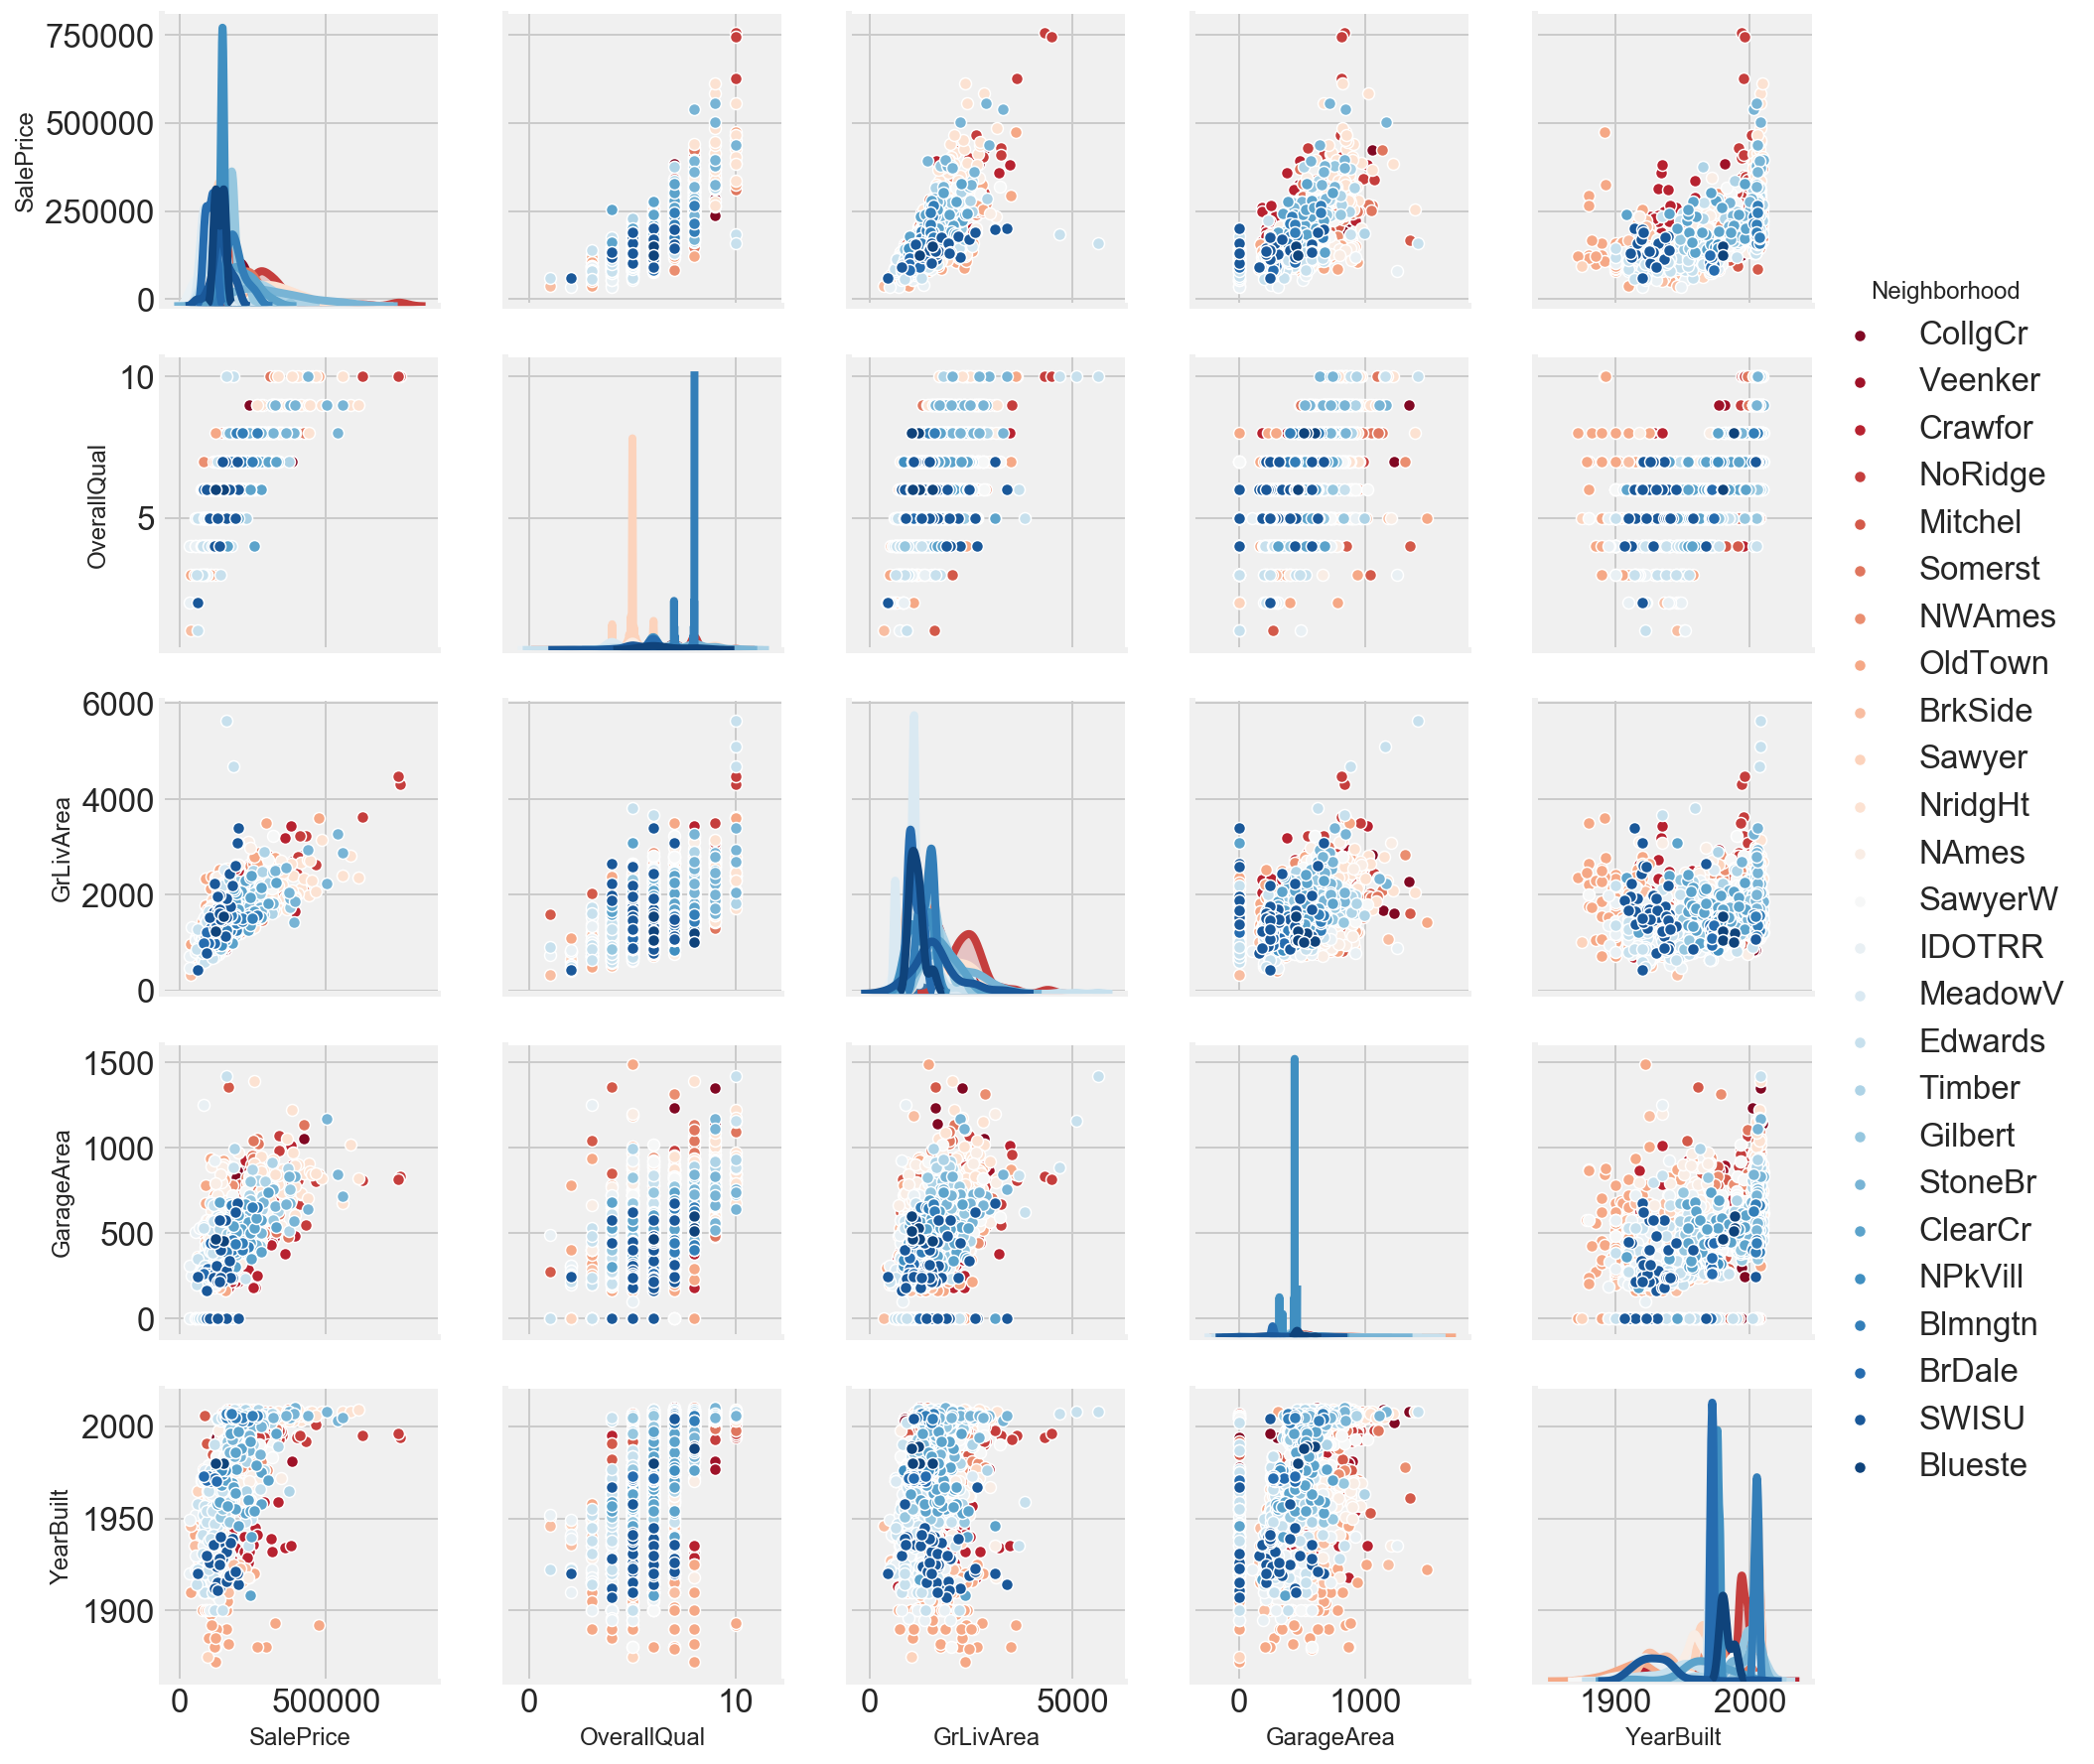

In [74]:
# Plot Scatter plots of Sale Price and 4 correlated variables according to Neighborhood
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt','Neighborhood']
plt.figure(figsize=(14,8), dpi= 80)
sns.pairplot(df[cols], kind="scatter", hue="Neighborhood",palette="RdBu")
plt.show()


In the above plots there is a clear relationship with **sale price** and  many vsriables for suchs as *'OverallQual' and 'YearBuilt'*  The relationship seems to be stronger with *'OverallQual'*, where the  sales prices increases.

In [75]:
# to get the train data from the meged data set we can use iloc and get all columns, while rows equal to the shape of the train[0]
df.iloc[:train.shape[0],:].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


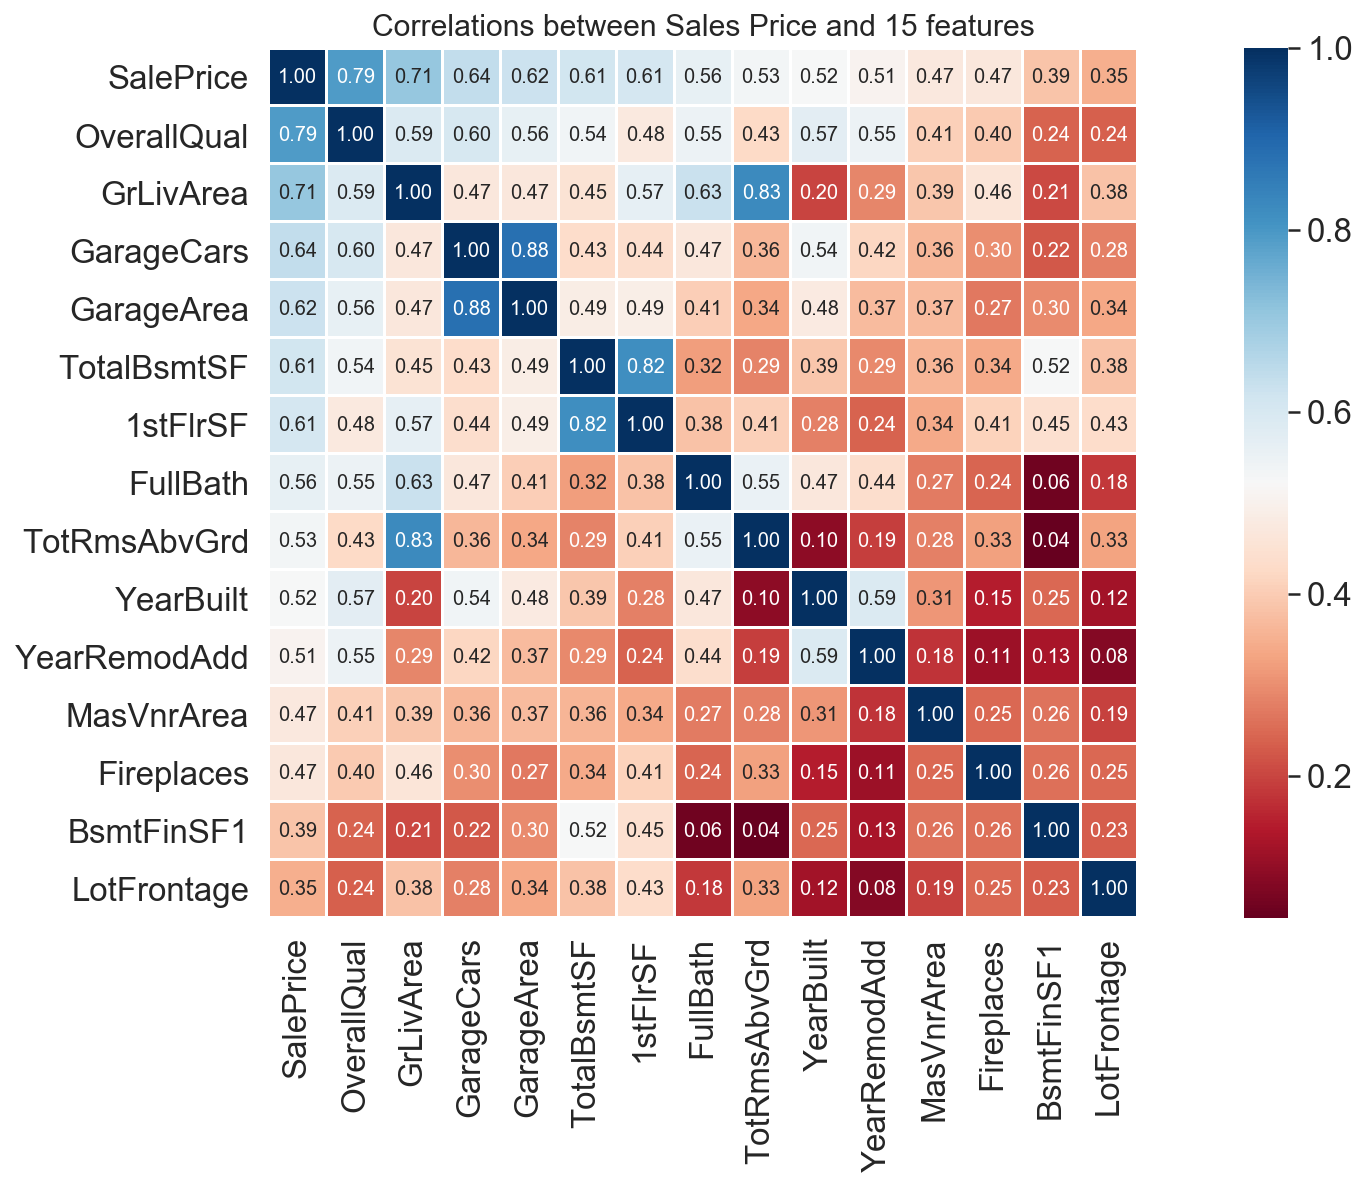

In [76]:
#saleprice correlation matrix
corrmat = df.iloc[:train.shape[0],:].corr()
plt.figure(figsize=(17, 8))
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df.iloc[:train.shape[0],:][cols].values.T)
sns.set(font_scale=1.50)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,
                 cmap = 'RdBu', linecolor = 'white', linewidth = 1)
plt.title("Correlations between Sales Price and 15 features", fontsize =15)
plt.show()

# Machine Learning

In [218]:
# creating dummy variables for all categorical variables in the cleaned and merged dataset
df_d = pd.get_dummies(df , drop_first=True)
df_d.shape

(2919, 297)

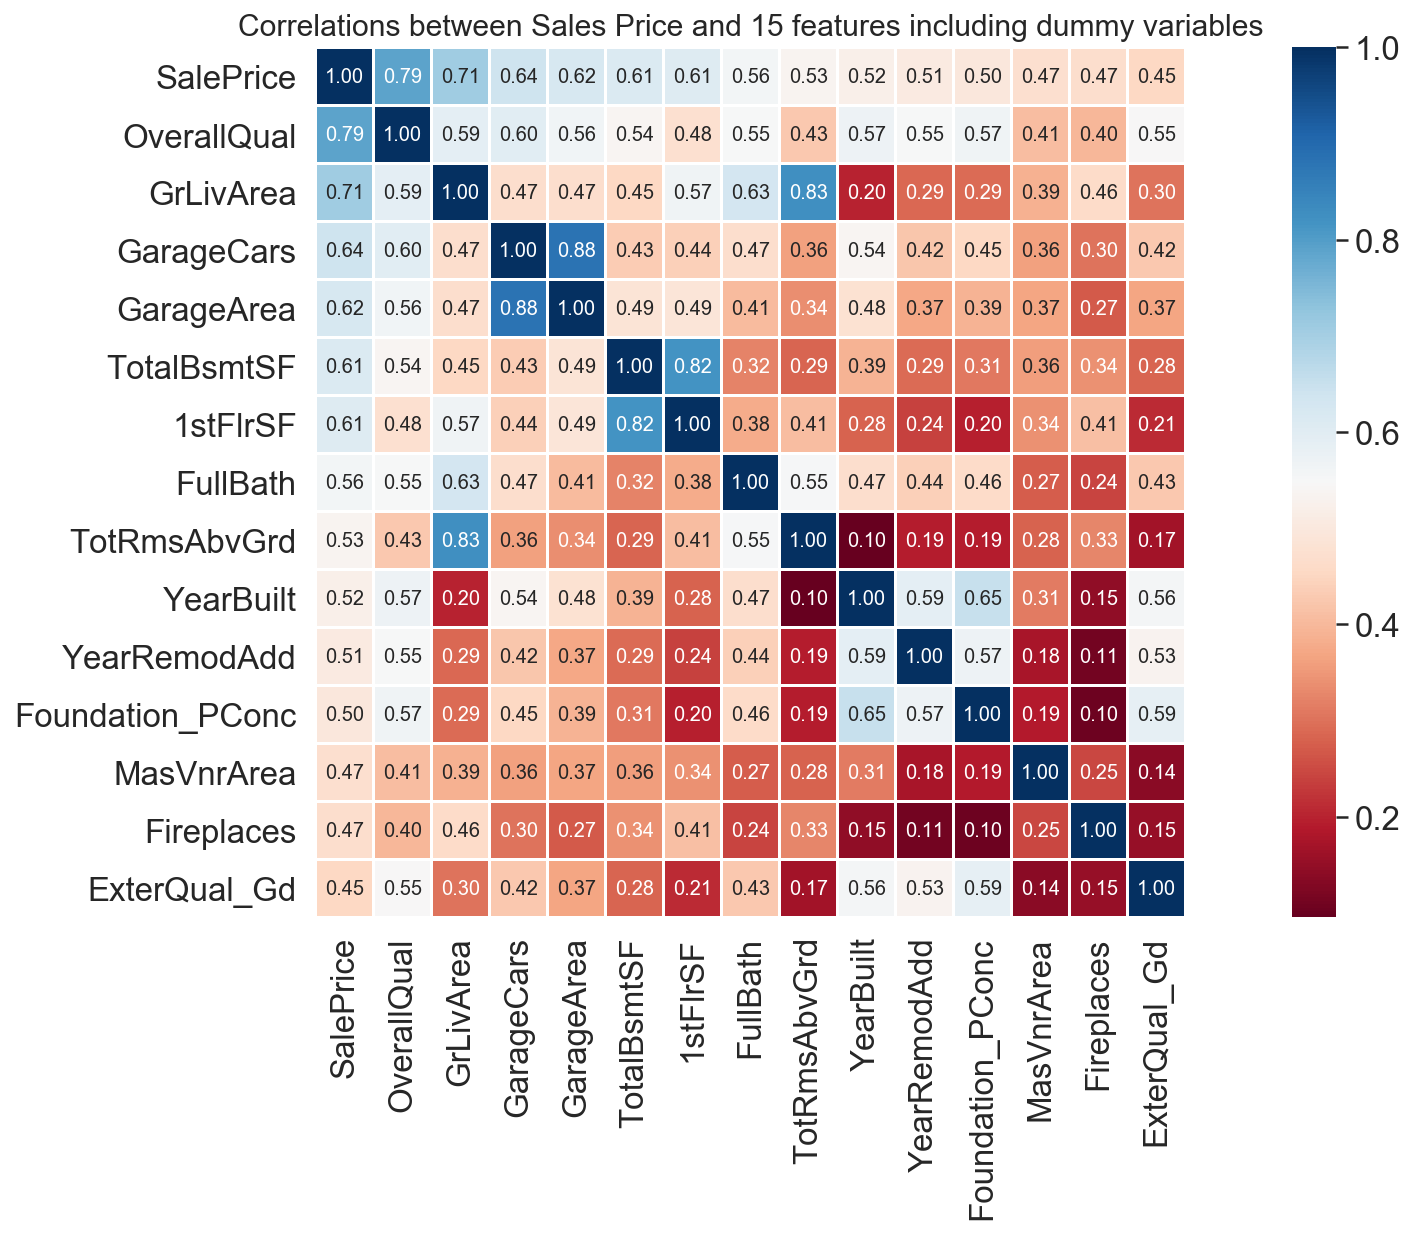

In [199]:
#saleprice correlation matrix
corrmat = df_d.iloc[:train.shape[0],:].corr()
plt.figure(figsize=(17, 8))
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_d.iloc[:train.shape[0],:][cols].values.T)
sns.set(font_scale=1.50)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,
                 cmap = 'RdBu', linecolor = 'white', linewidth = 1)
plt.title("Correlations between Sales Price and 15 features including dummy variables", fontsize =15)
plt.show()

In [219]:
# getting the target (sale price) column as y
y=pd.DataFrame(df_d.pop('SalePrice'))

In [220]:
# checking the shape of the train data set, to know from where to cut data set to get training data useing iloc
train.shape[0]

1460

In [221]:
# using iloc on both the target and training data we can get a nice seperation between training and testing datasets
X_train = df_d.iloc[:train.shape[0] , :]
y_train = y.iloc[:train.shape[0]]

In [222]:
# checking train dataset shape to make sure we did correct seperation
print(X_train.shape , y_train.shape)

(1460, 296) (1460, 1)


In [223]:
 # importing test/train split, and use it on training dataset to train the models and score them 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3 , random_state = 101)


In [224]:
# importing scaler, then scale training and test dataframes
from sklearn.preprocessing import StandardScaler 

s = StandardScaler()

X_train_d_s = pd.DataFrame(s.fit_transform(X_train) , columns=X_train.columns)
X_test_d_s = pd.DataFrame(s.transform(X_test) , columns=X_test.columns)

In [225]:
#importing models 
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [124]:
# using grid search on GradientBoostingRegressor model to get the best hyperparameters
num_estimators = [3000 , 4000]
learn_rates = [0.02, 0.05]
max_depths = [ 3 , 4]
min_samples_leaf = [10 , 15]
min_samples_split = [10 , 15]
max_features=['sqrt']

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split , 
             'max_features' : max_features }

grad = GridSearchCV(GradientBoostingRegressor(loss='huber'),
                           param_grid, cv=3, verbose= 1 , n_jobs=-1)
grad.fit(X_train_d_s , y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='huber', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_i...
                             

In [127]:
# getting train score
grad.score(X_train_d_s , y_train)

0.9526219728791933

In [128]:
# getting test scores
grad.score(X_test_d_s , y_test)

0.8570172828180459

We can see the model have a little differents in testing and training score, this indicate that there is a little bit of overfit.

In [129]:
# creating dataframe containing model feature important
coef_df = pd.DataFrame({'feature': X_train_d_s.columns,
                        'importance': abs(grad.best_estimator_.feature_importances_), 
                        })

coef_df.head()

,feature,importance
0,Id,0.001660
1,LotFrontage,0.015624
2,LotArea,0.017919
3,OverallQual,0.057123
4,YearBuilt,0.033010


In [130]:
# sort by absolute value of coefficient (magnitude)
coef_df.sort_values('importance', ascending=False, inplace=True)
coef_df[:10]

,feature,importance
14,GrLivArea,0.075299
173,ExterQual_TA,0.067359
11,1stFlrSF,0.061212
23,GarageYrBlt,0.059750
3,OverallQual,0.057123
25,GarageArea,0.052044
24,GarageCars,0.046509
10,TotalBsmtSF,0.038158
22,Fireplaces,0.037759
233,FireplaceQu_None,0.035692


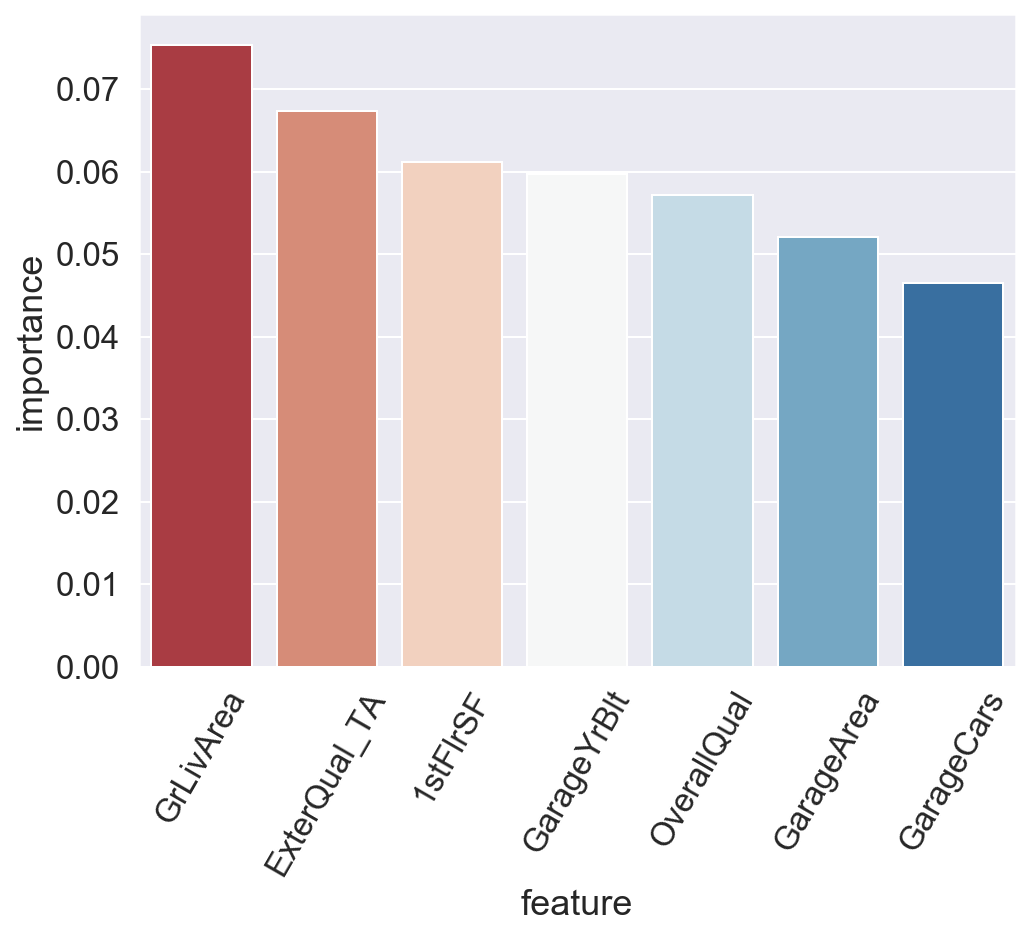

In [131]:
# get e barplot for features
plt.figure(figsize=(7,6))
plt.xticks(rotation=60)
sns.barplot(coef_df.feature[:7] , coef_df.importance[:7],palette='RdBu') # top features

In [150]:
# using RandomGridSerach  to fide best hyperparametrs for RandomForestRegressor
par = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# par = {'n_estimators':[ 1500,2000,3000],
#  'min_samples_split': [5,10],
#  'min_samples_leaf': [2,5],
#  'max_features': ['auto', 'sqrt'],
#  'max_depth': [30, 40, 50],
#  'bootstrap': [True, False]}

ra = RandomizedSearchCV(RandomForestRegressor(),
                   par , cv = 5 , verbose= 1  , n_jobs= -1)
ra.fit(X_train_d_s , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [ ]:
par = {'n_estimators':[ 1500,2000,3000],
 'min_samples_split': [5,10],
 'min_samples_leaf': [2,5],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [30, 40, 50],
 'bootstrap': [True, False]}

ra = RandomizedSearchCV(RandomForestRegressor(),
                   par , cv = 5 , verbose= 1  , n_jobs= -1)
ra.fit(X_train_d_s , y_train)

In [200]:
ra.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [154]:
ra.score(X_train_d_s , y_train)

0.9792599644807979

In [155]:
ra.score(X_test_d_s , y_test)

0.8300380151689033

We can see the huge different on training and testing scores, random forest tend to overfit.

In [156]:
# creating dataframe containing model feature important
coef_df = pd.DataFrame({'feature': X_train_d_s.columns,
                        'importance': abs(ra.best_estimator_.feature_importances_), 
                        })

coef_df.head()

,feature,importance
0,Id,0.004250
1,LotFrontage,0.014616
2,LotArea,0.021974
3,OverallQual,0.085723
4,YearBuilt,0.040468


In [157]:
# sort by absolute value of coefficient (magnitude)
coef_df.sort_values('importance', ascending=False, inplace=True)
coef_df[:10]

,feature,importance
3,OverallQual,0.085723
14,GrLivArea,0.066084
24,GarageCars,0.059196
10,TotalBsmtSF,0.056891
25,GarageArea,0.048828
11,1stFlrSF,0.046993
4,YearBuilt,0.040468
173,ExterQual_TA,0.037200
7,BsmtFinSF1,0.032592
23,GarageYrBlt,0.030848


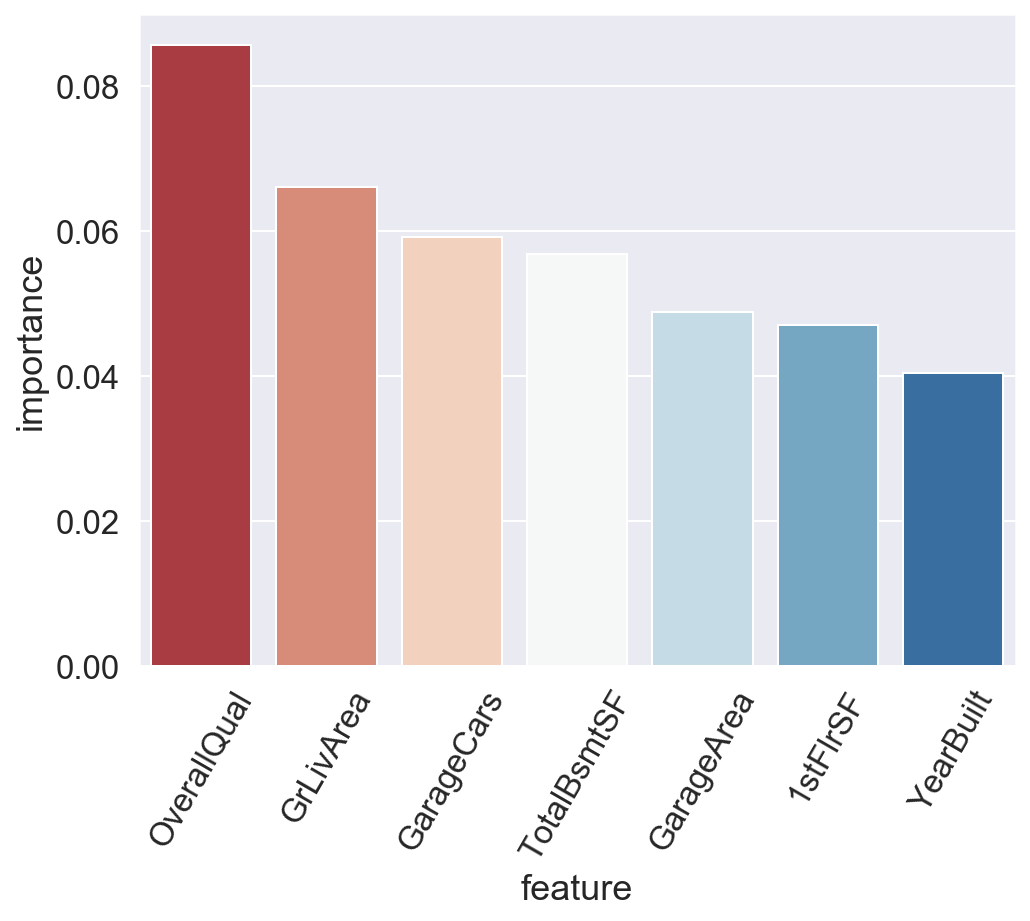

In [158]:
# get e barplot for features
plt.figure(figsize=(7,6))
plt.xticks(rotation=60)
sns.barplot(coef_df.feature[:7] , coef_df.importance[:7],palette='RdBu') # top  features

In [226]:
# lasso with a range values for alpha
la = LassoCV(alphas=np.logspace(0, 5, 200) , n_jobs=-1)

la.fit(X_train_d_s , y_train)

LassoCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
        copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=-1, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [227]:
la.score(X_train_d_s , y_train)

0.9053320369720322

In [228]:
la.score(X_test_d_s , y_test)

0.7503144411958814

We can see the overfit.

In [167]:
# creating dataframe containing model feature important
coef_df = pd.DataFrame({'feature': X_train_d_s.columns,
                        'importance': abs(la.coef_),
                        })

coef_df.head()

,feature,importance
0,Id,0.000000
1,LotFrontage,1811.631902
2,LotArea,2823.262559
3,OverallQual,16885.221399
4,YearBuilt,5272.629332


In [168]:
# sort by absolute value of coefficient (magnitude)
coef_df.sort_values('importance', ascending=False, inplace=True)
coef_df[:10]

,feature,importance
14,GrLivArea,26771.439142
3,OverallQual,16885.221399
7,BsmtFinSF1,8310.428922
104,Condition2_PosN,8099.255395
10,TotalBsmtSF,7360.017165
84,Neighborhood_NridgHt,7203.158201
4,YearBuilt,5272.629332
184,BsmtQual_Gd,4939.989366
288,SaleType_New,4915.480310
222,KitchenQual_Gd,4896.427673


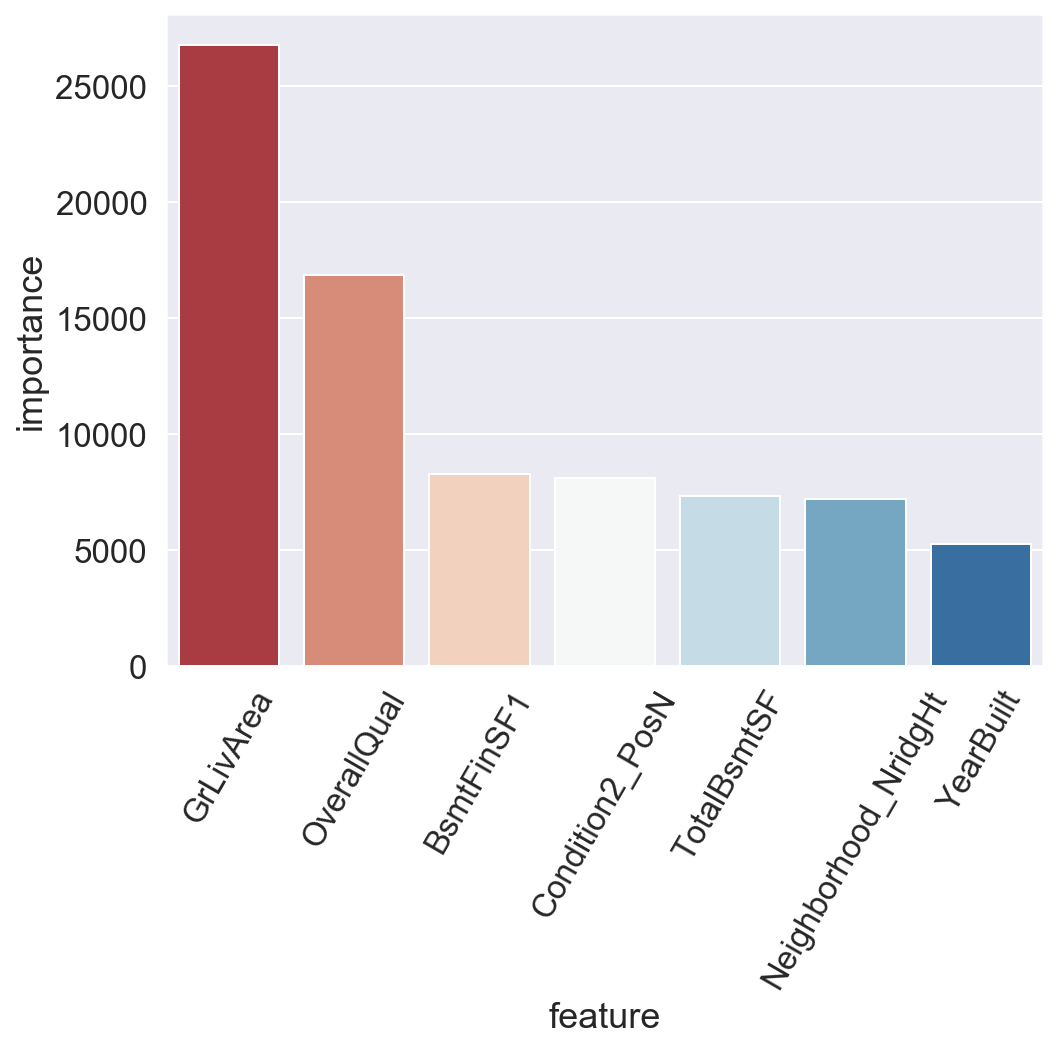

In [169]:
# get e barplot for features
plt.figure(figsize=(7,6))
plt.xticks(rotation=60)
sns.barplot(coef_df.feature[:7] , coef_df.importance[:7],palette='RdBu') # top features

In [170]:
# Ridge with a range values for alpha
ri = RidgeCV(alphas=np.logspace(0, 5, 200))

ri.fit(X_train_d_s , y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [171]:
ri.score(X_train_d_s , y_train)

0.9163873922642167

In [172]:
ri.score(X_test_d_s , y_test)

0.7727960086480248

A lot of overfitting.

In [173]:
# creating dataframe containing model feature important
coef_df = pd.DataFrame({'feature': X_train_d_s.columns,
                        'importance': abs(ri.coef_[0]),
                        })

coef_df.head()

,feature,importance
0,Id,145.141784
1,LotFrontage,2564.476310
2,LotArea,3309.510722
3,OverallQual,8684.830386
4,YearBuilt,2927.080472


In [174]:
# sort by absolute value of coefficient (magnitude)
coef_df.sort_values('importance', ascending=False, inplace=True)
coef_df[:10]

,feature,importance
3,OverallQual,8684.830386
14,GrLivArea,8416.179643
11,1stFlrSF,6659.794085
10,TotalBsmtSF,6630.354015
84,Neighborhood_NridgHt,5948.821095
7,BsmtFinSF1,5880.650995
104,Condition2_PosN,5422.173883
83,Neighborhood_NoRidge,4905.570857
6,MasVnrArea,4894.424894
21,TotRmsAbvGrd,4880.878496


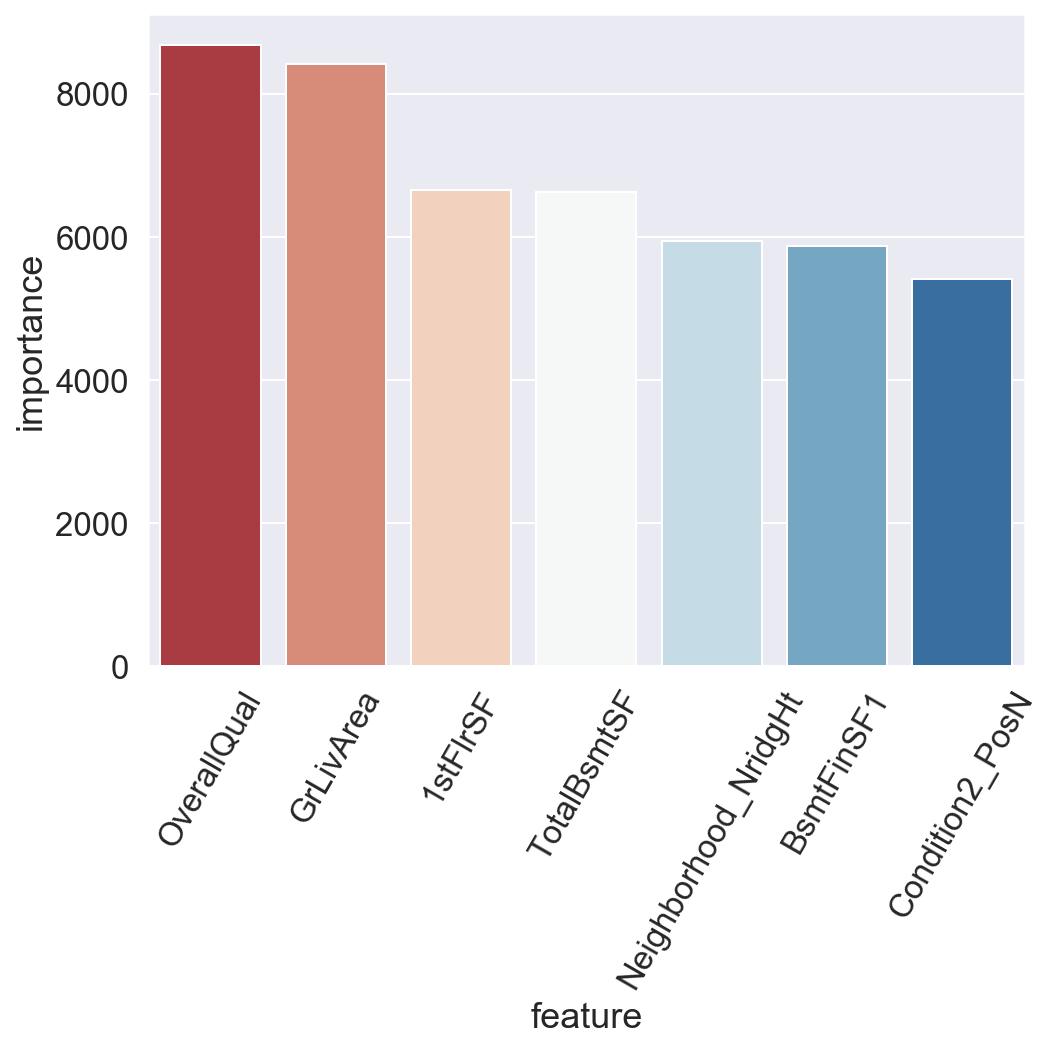

In [175]:
# get e barplot for features
plt.figure(figsize=(7,6))
plt.xticks(rotation=60)
sns.barplot(coef_df.feature[:7] , coef_df.importance[:7],palette='RdBu') # top features

In [176]:
# ElasticNet with a range values for alpha and l1 ratio
ela = ElasticNetCV(l1_ratio=np.arange(0.01, 1.0, 0.05) , alphas=np.logspace(0, 5, 200))

ela.fit(X_train_d_s , y_train)

ElasticNetCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.370064...
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
             copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
             l1_ratio=array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]),
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [177]:
ela.score(X_train_d_s , y_train)

0.9149430404113821

In [178]:
ela.score(X_test_d_s , y_test)

0.7731323959195776

The overfitting is close to that in ridge and lasso

In [182]:
# creating dataframe containing model feature important
coef_df = pd.DataFrame({'feature': X_train_d_s.columns,
                        'importance': abs(ela.coef_), # its logistic regression, we can get coef_, right?
                        })

coef_df.head()

,feature,importance
0,Id,122.074589
1,LotFrontage,2570.237232
2,LotArea,3257.121946
3,OverallQual,8593.296441
4,YearBuilt,2846.689776


In [183]:
# sort by absolute value of coefficient (magnitude)
coef_df.sort_values('importance', ascending=False, inplace=True)
coef_df[:10]

,feature,importance
3,OverallQual,8593.296441
14,GrLivArea,8306.095087
11,1stFlrSF,6602.443536
10,TotalBsmtSF,6581.741239
84,Neighborhood_NridgHt,5876.431442
7,BsmtFinSF1,5809.159879
104,Condition2_PosN,5280.681736
83,Neighborhood_NoRidge,4861.403043
21,TotRmsAbvGrd,4857.858365
6,MasVnrArea,4849.438826


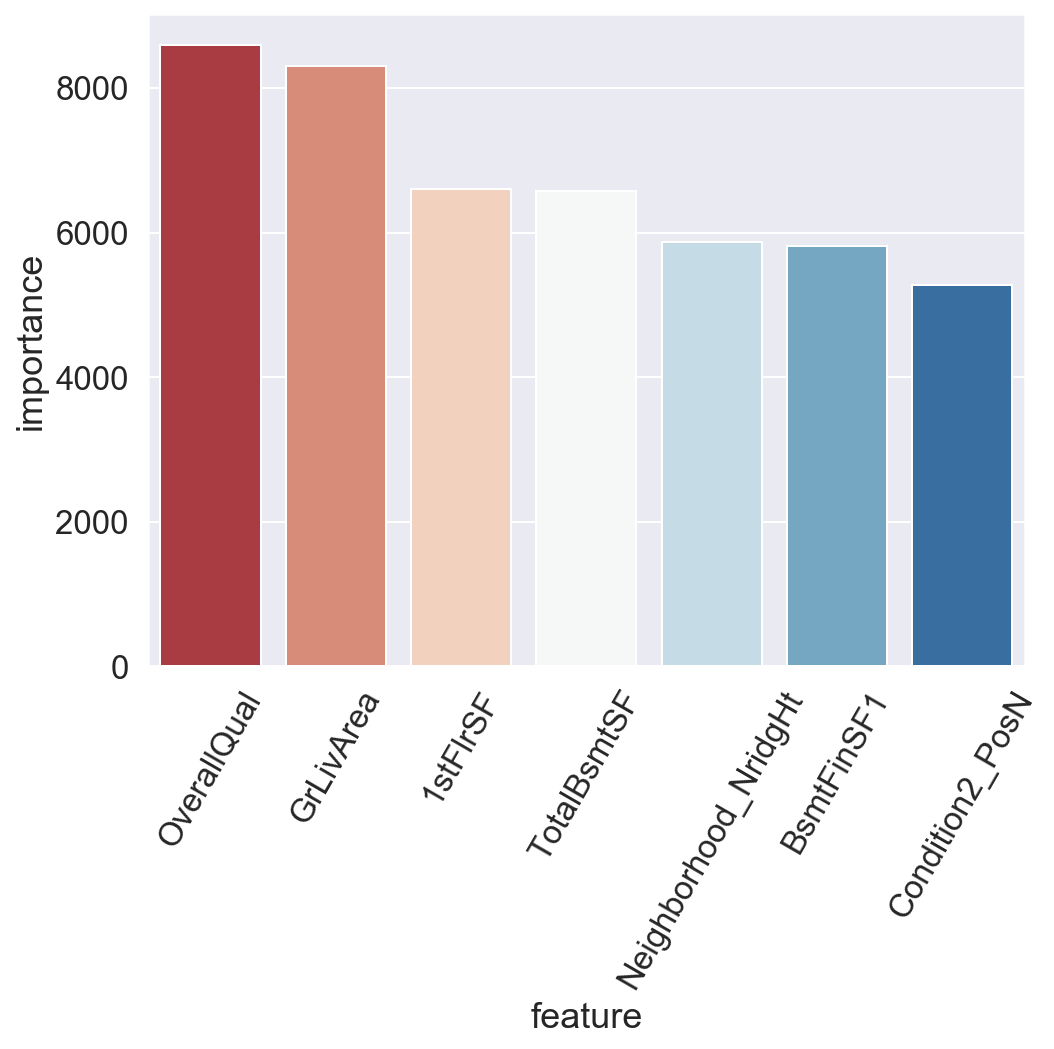

In [184]:
# get e barplot for features
plt.figure(figsize=(7,6))
plt.xticks(rotation=60)
sns.barplot(coef_df.feature[:7] , coef_df.importance[:7],palette='RdBu') # top features

# Recommendations

#### Models usedf with Score:

|Model|Train Score|Test Score|Comments|
|---|---|---|---|
|GradientBoostingRegressor|0.946254 |0.898502|We can see the model have a little differents in testing and training score, this indicate that there is a little bit of overfit| 
|RandomForestRegressor|0.968229 |0.840785 |We can see the huge different on training and testing scores, random forest tend to overfit| 
|Lasso CV |0.807590 |0.799138 |We can see the overfit| 
|Ridge CV |0.890357 |0.847826 |A lot of overfitting| 
|ElasticNetCV|0.867211|0.83499|The overfitting is close to that in ridge and lasso| 



# Predicting then submitting on Kaggle

In [229]:
# recreating the training and testing dataset to do the prediction on the testing data
df_d = pd.get_dummies(df , drop_first=True)

In [230]:
y=pd.DataFrame(df_d.pop('SalePrice'))

In [231]:
y_test = y.iloc[train.shape[0]:]
X_test= df_d.iloc[train.shape[0]:,:]

In [232]:
y_train = y.iloc[:train.shape[0]]
X_train = df_d.iloc[:train.shape[0] , :]

In [233]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

X_train_d_s = pd.DataFrame(s.fit_transform(X_train) , columns=X_train.columns)
X_test_d_s = pd.DataFrame(s.transform(X_test) , columns=X_test.columns)

In [190]:
# creating the dataframe then save it as csv file before submiting.
a = pd.DataFrame(grad.predict(X_test_d_s) , columns=['SalePrice'])

In [191]:
a['index'] = pd.DataFrame(df.Id.iloc[X_train.shape[0]:]).reset_index()['index']

In [192]:
b = pd.DataFrame(df.Id.iloc[X_train.shape[0]:]).reset_index().merge(a)

In [193]:
b.shape

(1459, 3)

In [194]:
b.drop(columns=['index'] , inplace=True)

In [195]:
b.to_csv('sub9GS.csv' , index=False)

In [196]:
pd.read_csv('sub9GS.csv').head()

,Id,SalePrice
0,1461,118470.544510
1,1462,159078.580185
2,1463,192477.810307
3,1464,203189.249552
4,1465,204682.885081
